In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Reading CSV file**

In [75]:
df = pd.read_csv("/content/KDDTrain+.txt")

In [76]:
df.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [77]:
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

df.columns = columns

In [78]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [79]:
df.shape

(125972, 43)

In [80]:
#Distribution of Target column

class_counts = df['attack'].value_counts()
class_counts

,count
attack,
normal,67342
neptune,41214
satan,3633
ipsweep,3599
portsweep,2931
smurf,2646
nmap,1493
back,956
teardrop,892


In [81]:
Class = []
for i in df.attack :
  if i == 'normal':
    Class.append("normal")
  else:
    Class.append("anomaly")
df['class'] = Class

In [82]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,class
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,anomaly
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,anomaly


In [83]:
#Distribution of Target column for binary class

class_counts = df['class'].value_counts()
class_counts

,count
class,
normal,67342
anomaly,58630


In [16]:
df.level.unique()

array([15, 19, 21, 18, 20, 17, 16, 12, 14, 11,  2, 13, 10,  9,  8,  7,  3,
        5,  1,  6,  0,  4])

# **PreProcessing**

In [17]:
df.isnull().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [19]:
df.nunique()

,0
duration,2981
protocol_type,3
service,70
flag,11
src_bytes,3341
dst_bytes,9326
land,2
wrong_fragment,3
urgent,4
hot,28


In [ ]:
#Dealing with null values

df['dst_bytes'] = df['dst_bytes'].fillna(df['dst_bytes'].mean())
df['src_bytes'] = df['src_bytes'].fillna(df['src_bytes'].mean())
df['count'] = df['count'].fillna(df['count'].mean())
df['srv_count'] = df['srv_count'].fillna(df['srv_count'].mean())

In [20]:
df.isnull().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


In [21]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack', 'level', 'class'],
      dtype='object')

In [22]:
df.dtypes

,0
duration,int64
protocol_type,object
service,object
flag,object
src_bytes,int64
dst_bytes,int64
land,int64
wrong_fragment,int64
urgent,int64
hot,int64


In [25]:
#Encoding using Label encoder

from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df['attack'] = enc.fit_transform(df['attack'])
df['class'] = enc.fit_transform(df['class'])
df['protocol_type'] = enc.fit_transform(df['protocol_type'])
df['service'] = enc.fit_transform(df['service'])
df['flag'] = enc.fit_transform(df['flag'])

In [26]:
df.dtypes

,0
duration,int64
protocol_type,int64
service,int64
flag,int64
src_bytes,int64
dst_bytes,int64
land,int64
wrong_fragment,int64
urgent,int64
hot,int64


In [27]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,class
0,0,2,44,9,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.0,0.00,11,15,1
1,0,1,49,5,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,9,19,0
2,0,1,24,9,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.0,0.01,11,21,1
3,0,1,24,9,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,11,21,1
4,0,1,49,1,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.0,1.00,9,21,0


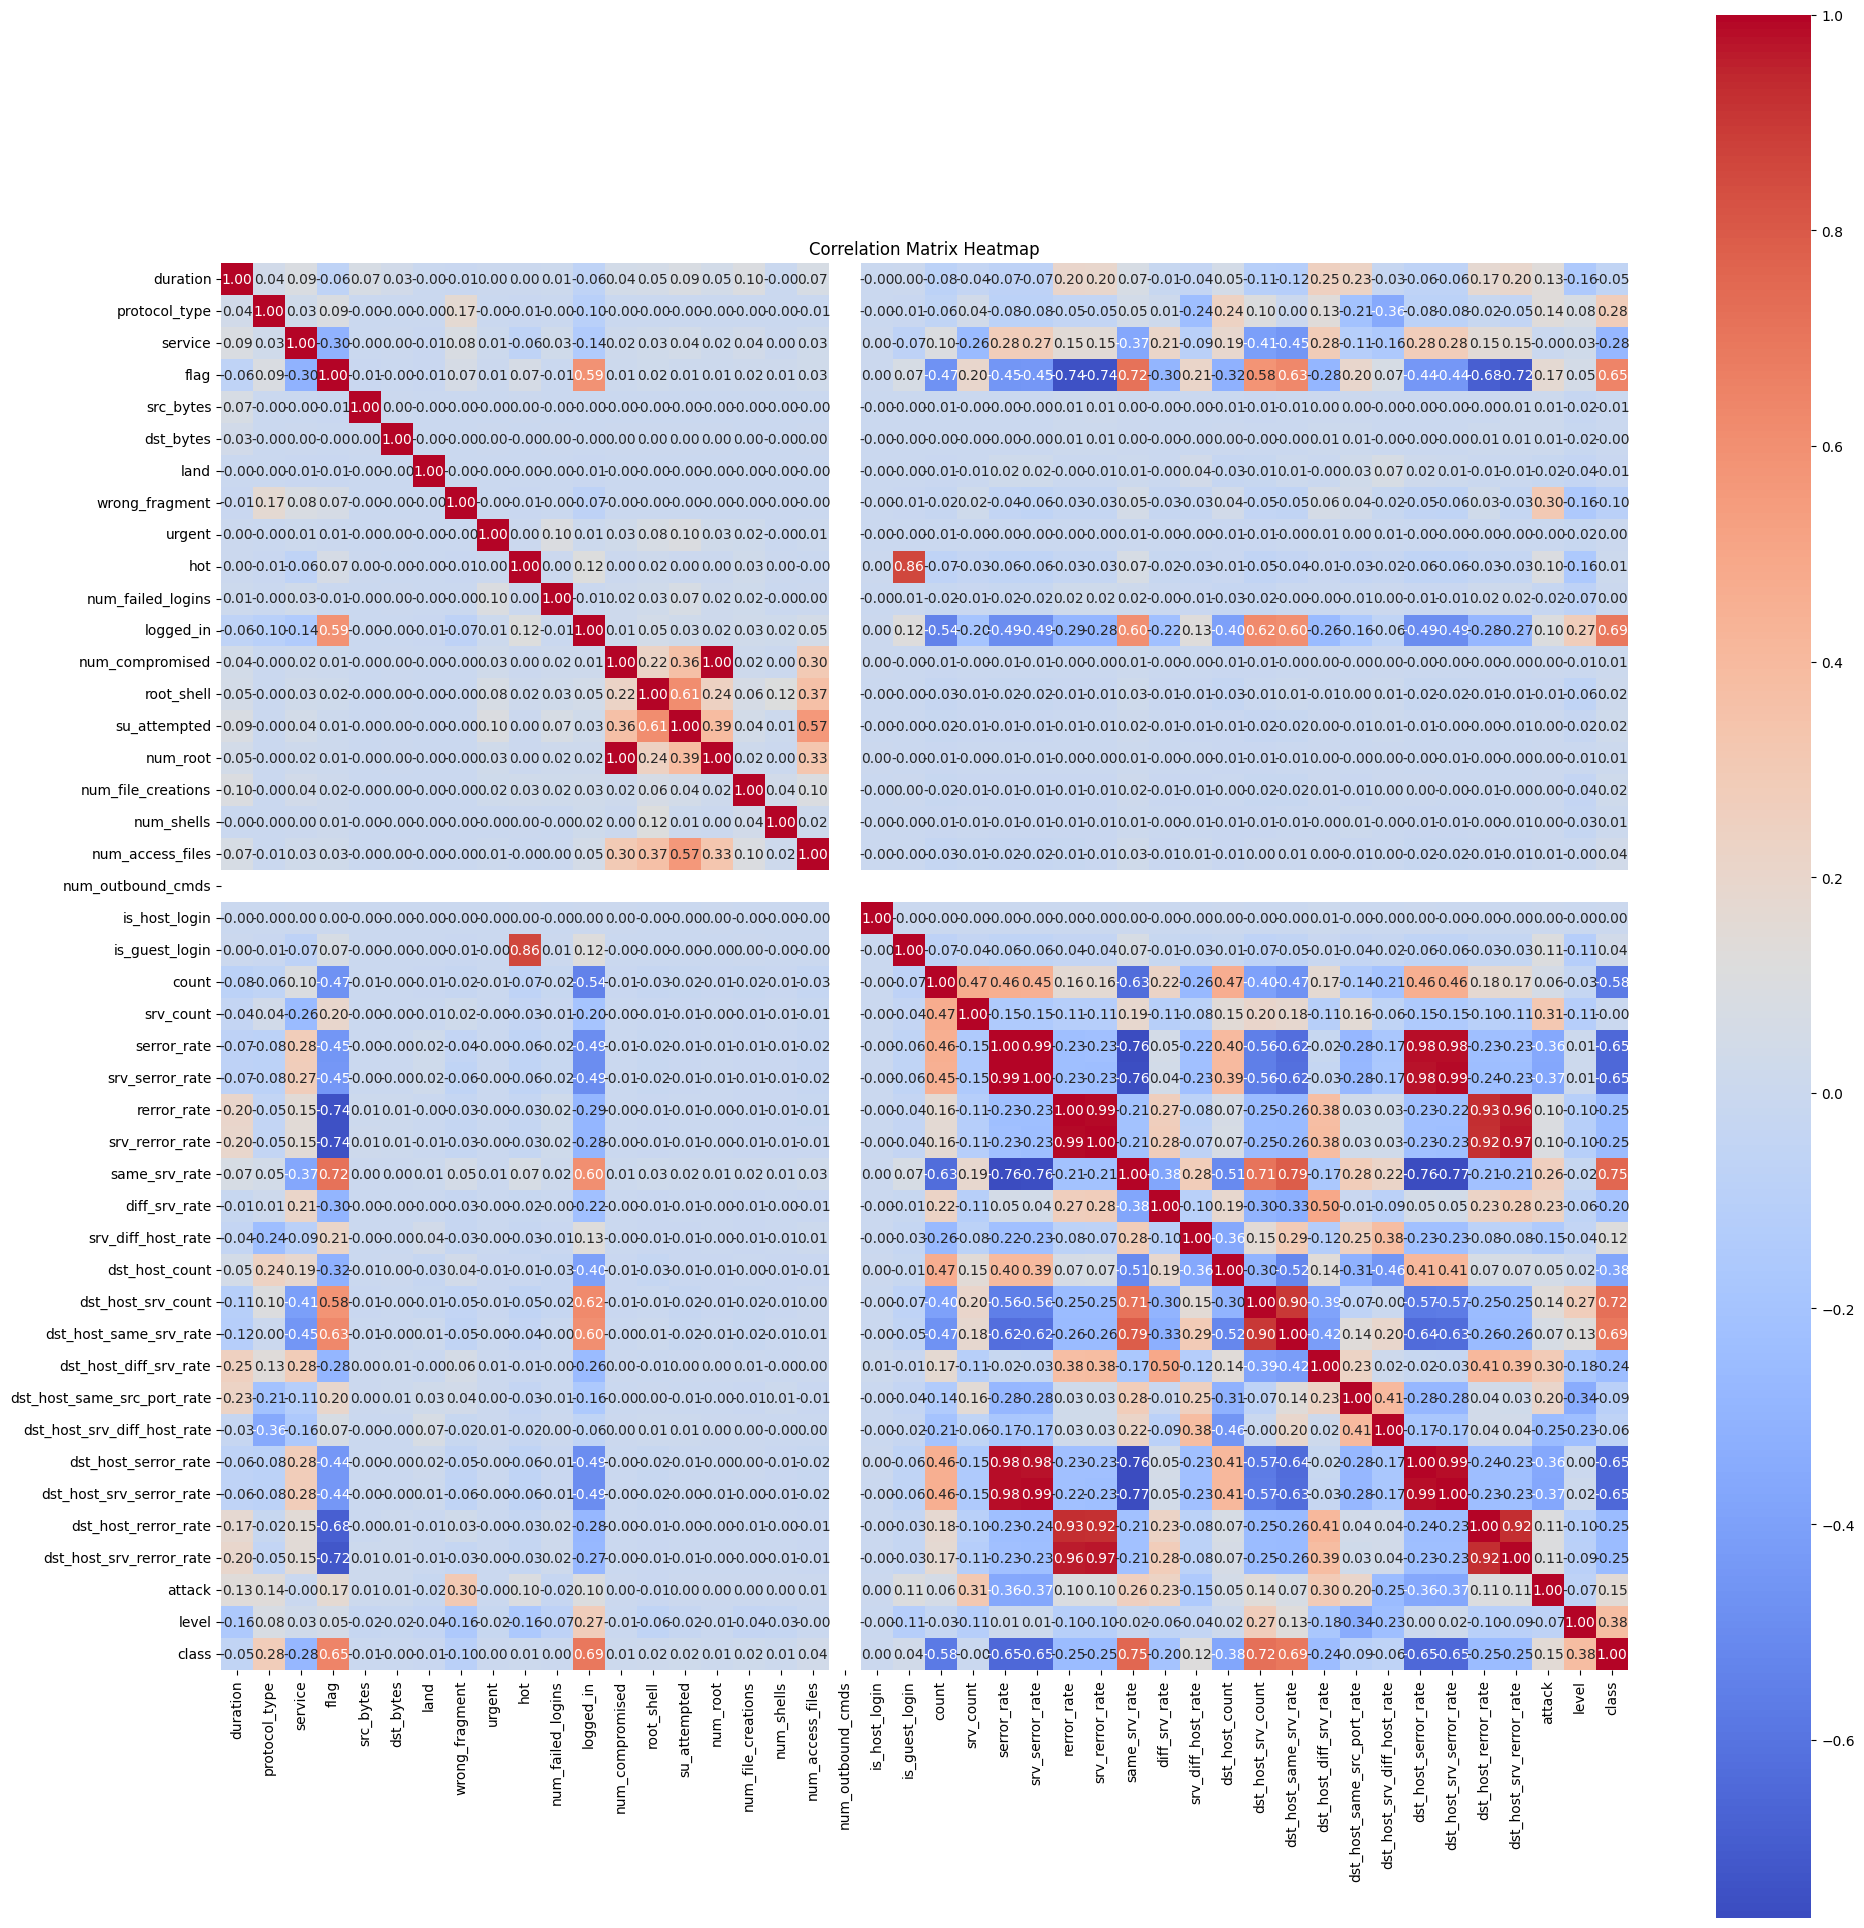

In [28]:
# Ploting heatmap for checking Corelation

import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()


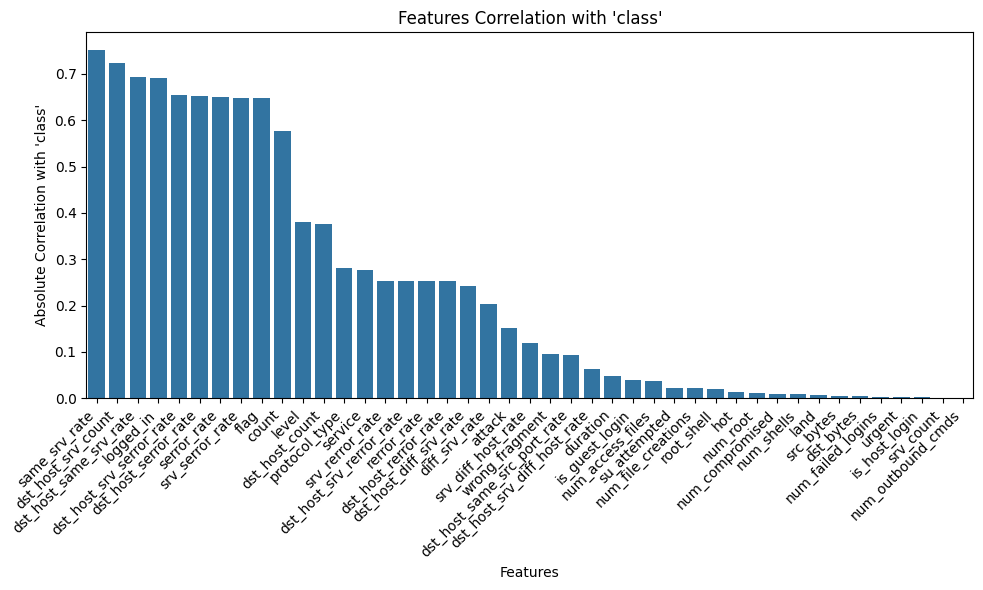

In [32]:
# Features Correlation with 'class'
top_features = corr_matrix['class'].abs().sort_values(ascending=False)[1:]

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.index, y=top_features.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Features")
plt.ylabel("Absolute Correlation with 'class'")
plt.title("Features Correlation with 'class'")
plt.tight_layout()
plt.show()


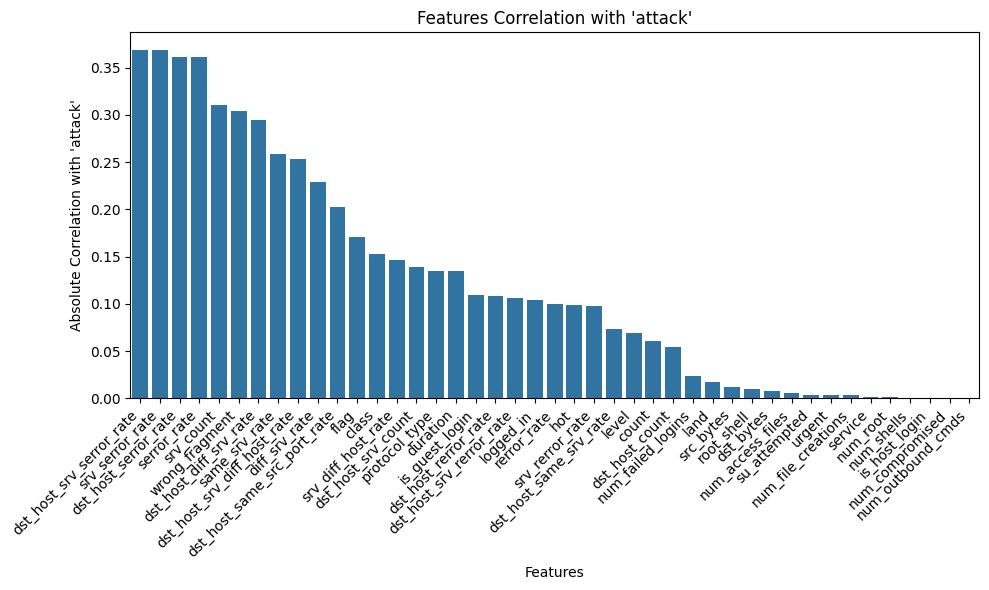

In [34]:
# Features Correlation with 'attack'
top_features = corr_matrix['attack'].abs().sort_values(ascending=False)[1:]

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.index, y=top_features.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Features")
plt.ylabel("Absolute Correlation with 'attack'")
plt.title("Features Correlation with 'attack'")
plt.tight_layout()
plt.show()


In [37]:
# Feature selection using heatmap (droping highly corelated features)

features_class= ['protocol_type', 'service', 'flag','wrong_fragment','logged_in', 'count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate','level',
]


In [38]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack', 'level', 'class'],
      dtype='object')

In [39]:
features_attack =['duration', 'protocol_type', 'flag', 'wrong_fragment', 'hot', 'logged_in',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'level']

# **Model Training with all features for binary class as well as multiclass**

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

X = df.drop(['attack', 'class'], axis=1)
y = df['attack']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVC": SVC(),
    "Decision Tree": DecisionTreeClassifier()
}

results = []

for name, model in models.items():
    print(f"\n{name}")

    if name in ["Logistic Regression", "KNN", "SVC"]:
        model.fit(X_train_scaled, y_train)
        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_test_pred))

    results.append({
        "Model": name,
        "Training Accuracy": train_acc,
        "Test Accuracy": test_acc
    })

results_df = pd.DataFrame(results)
results_df_sorted = results_df.sort_values(by="Test Accuracy")
print("\nAccuracy Comparison Table for multi class")
print(results_df_sorted.to_string(index=False))



Logistic Regression
Training Accuracy: 0.9917
Test Accuracy: 0.9908
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       201
           1       1.00      0.71      0.83         7
           2       0.00      0.00      0.00         0
           3       1.00      0.93      0.96        14
           4       0.50      0.50      0.50         2
           5       0.95      0.96      0.96       743
           6       1.00      1.00      1.00         2
           7       0.50      0.33      0.40         3
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00      8238
          10       0.89      0.96      0.93       298
          11       0.99      0.99      0.99     13386
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      0.97      0.99        36
          15       0.97      0.97      0.9

In [64]:
X = df.drop(['attack', 'class'], axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVC": SVC(),
    "Decision Tree": DecisionTreeClassifier()
}

results = []

for name, model in models.items():
    print(f"\n{name}")

    if name in ["Logistic Regression", "KNN", "SVC"]:
        model.fit(X_train_scaled, y_train)
        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_test_pred))

    results.append({
        "Model": name,
        "Training Accuracy": train_acc,
        "Test Accuracy": test_acc
    })

results_df = pd.DataFrame(results)
results_df_sorted = results_df.sort_values(by="Test Accuracy")
print("\nAccuracy Comparison Table for binary class")
print(results_df_sorted.to_string(index=False))



Logistic Regression
Training Accuracy: 0.9781
Test Accuracy: 0.9767
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     11809
           1       0.98      0.97      0.98     13386

    accuracy                           0.98     25195
   macro avg       0.98      0.98      0.98     25195
weighted avg       0.98      0.98      0.98     25195


KNN
Training Accuracy: 0.9991
Test Accuracy: 0.9983
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11809
           1       1.00      1.00      1.00     13386

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195


Random Forest
Training Accuracy: 1.0000
Test Accuracy: 0.9998
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00 

# **Model Training (binary class target)**

In [40]:
from sklearn.model_selection import train_test_split

x = df[features_class]
y = df['class']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=42)

In [41]:
# Scaling data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

## **Logistic Regression**

In [42]:
# Logistic Regression

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train_scaled, y_train)

y_train_pred = model_lr.predict(X_train_scaled)
y_test_pred = model_lr.predict(X_test_scaled)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy:  {test_accuracy:.4f}")

print("\nClassification Report (Test Set):\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix (Test Set):\n", confusion_matrix(y_test, y_test_pred))

Training Accuracy: 0.9751
Testing Accuracy:  0.9742

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.97      0.98      0.97     11809
           1       0.98      0.97      0.98     13386

    accuracy                           0.97     25195
   macro avg       0.97      0.97      0.97     25195
weighted avg       0.97      0.97      0.97     25195

Confusion Matrix (Test Set):
 [[11520   289]
 [  362 13024]]


## **KNN**

In [43]:
# KNN with k=3

from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train_scaled, y_train)

y_train_pred = model_knn.predict(X_train_scaled)
y_test_pred = model_knn.predict(X_test_scaled)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy:  {test_accuracy:.4f}")

print("\nClassification Report (Test Set):\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix (Test Set):\n", confusion_matrix(y_test, y_test_pred))


Training Accuracy: 0.9994
Testing Accuracy:  0.9988

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11809
           1       1.00      1.00      1.00     13386

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195

Confusion Matrix (Test Set):
 [[11799    10]
 [   20 13366]]


## **Decision Tree**

In [44]:
# Decision Tree using creterion gini and entropy

from sklearn.tree import DecisionTreeClassifier

for criterion in ['gini', 'entropy']:
  model_dt = DecisionTreeClassifier(criterion=criterion)
  model_dt.fit(X_train_scaled, y_train)

  y_train_pred = model_dt.predict(X_train_scaled)
  y_test_pred = model_dt.predict(X_test_scaled)

  train_accuracy = accuracy_score(y_train, y_train_pred)
  test_accuracy = accuracy_score(y_test, y_test_pred)

  print(f"Criterion: {criterion}")
  print(f"Training Accuracy: {train_accuracy:.4f}")
  print(f"Testing Accuracy:  {test_accuracy:.4f}")

  print("\nClassification Report (Test Set):\n", classification_report(y_test, y_test_pred))
  print("Confusion Matrix (Test Set):\n", confusion_matrix(y_test, y_test_pred))
  print("\n")

Criterion: gini
Training Accuracy: 1.0000
Testing Accuracy:  0.9983

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11809
           1       1.00      1.00      1.00     13386

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195

Confusion Matrix (Test Set):
 [[11797    12]
 [   32 13354]]


Criterion: entropy
Training Accuracy: 1.0000
Testing Accuracy:  0.9987

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11809
           1       1.00      1.00      1.00     13386

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195

Confusion Matrix (Test Set):
 [[11799    10]
 [   24 13362]]




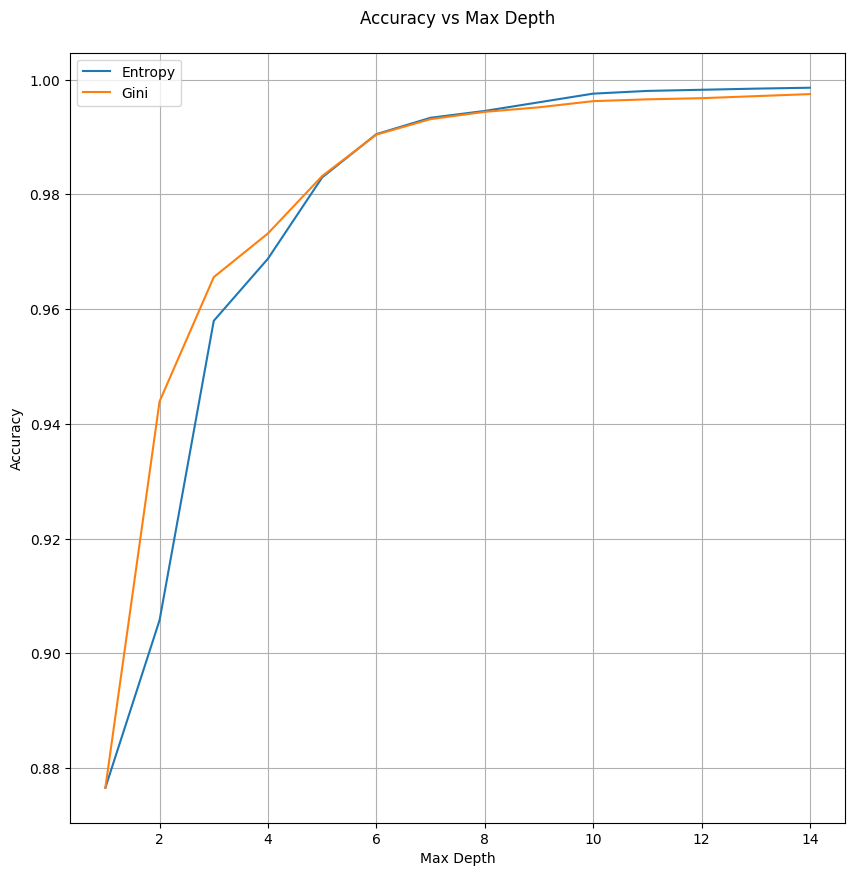

In [45]:
# Plotting graph for Accuracy with different Max_depths

def calculate_accuracy(x_train, y_train, x_test, y_test, criterion, max_depth):
  dt_classifier = DecisionTreeClassifier(criterion=criterion, random_state=42, max_depth=max_depth)
  dt_classifier.fit(x_train, y_train)
  y_pred = dt_classifier.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  return accuracy

max_depths = range(1, 15)
accuracy_entropy = []
accuracy_gini = []

for depth in max_depths:
  accuracy_entropy.append(calculate_accuracy(x_train, y_train, x_test, y_test, 'entropy', depth))
  accuracy_gini.append(calculate_accuracy(x_train, y_train, x_test, y_test, 'gini', depth))

plt.figure(figsize=(10, 10))
plt.plot(max_depths, accuracy_entropy, label='Entropy')
plt.plot(max_depths, accuracy_gini, label='Gini')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth\n')
plt.legend()
plt.grid(True)
plt.show()


## **SVM**

In [46]:
#SVM for kernels = ['linear', 'poly', 'rbf', 'sigmoid']

from sklearn.svm import SVC
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
  model_svc = SVC(kernel=kernel)
  model_svc.fit(X_train_scaled, y_train)

  y_train_pred = model_svc.predict(X_train_scaled)
  y_test_pred = model_svc.predict(X_test_scaled)

  train_accuracy = accuracy_score(y_train, y_train_pred)
  test_accuracy = accuracy_score(y_test, y_test_pred)
  print(f"Kernel Type: {kernel}")
  print(f"Training Accuracy: {train_accuracy:.4f}")
  print(f"Testing Accuracy:  {test_accuracy:.4f}")

  print("\nClassification Report (Test Set):\n", classification_report(y_test, y_test_pred))
  print("Confusion Matrix (Test Set):\n", confusion_matrix(y_test, y_test_pred))
  print("\n")

Kernel Type: linear
Training Accuracy: 0.9769
Testing Accuracy:  0.9758

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.97      0.98      0.97     11809
           1       0.98      0.97      0.98     13386

    accuracy                           0.98     25195
   macro avg       0.98      0.98      0.98     25195
weighted avg       0.98      0.98      0.98     25195

Confusion Matrix (Test Set):
 [[11596   213]
 [  397 12989]]


Kernel Type: poly
Training Accuracy: 0.9980
Testing Accuracy:  0.9971

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11809
           1       1.00      1.00      1.00     13386

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195

Confusion Matrix (Test Set):
 [[11789    20]
 [   54 13332]]


Kernel

In [ ]:
# Hyperparameter tunning for SVC

from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

svc = SVC()
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_svc = grid_search.best_estimator_
y_pred = best_svc.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the best SVC model: {accuracy:.4f}")

print("\nClassification Report (Test Set):\n", classification_report(y_test, y_pred))
print("Confusion Matrix (Test Set):\n", confusion_matrix(y_test, y_pred))


## **Random Forest**

In [47]:
# Random Forest Model

from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train_scaled, y_train)

y_train_pred = model_rf.predict(X_train_scaled)
y_test_pred = model_rf.predict(X_test_scaled)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy:  {test_accuracy:.4f}")

print("\nClassification Report (Test Set):\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix (Test Set):\n", confusion_matrix(y_test, y_test_pred))

Training Accuracy: 1.0000
Testing Accuracy:  0.9992

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11809
           1       1.00      1.00      1.00     13386

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195

Confusion Matrix (Test Set):
 [[11804     5]
 [   15 13371]]


# **Model Training (multiclass target)**

In [51]:
x = df[features_attack]
y = df['attack']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=42)

In [52]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [53]:
# Logistic Regression

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train_scaled, y_train)

y_train_pred = model_lr.predict(X_train_scaled)
y_test_pred = model_lr.predict(X_test_scaled)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy:  {test_accuracy:.4f}")

print("\nClassification Report (Test Set):\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix (Test Set):\n", confusion_matrix(y_test, y_test_pred))

Training Accuracy: 0.9895
Testing Accuracy:  0.9884

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       201
           1       0.25      0.14      0.18         7
           2       0.00      0.00      0.00         0
           3       1.00      0.79      0.88        14
           4       0.00      0.00      0.00         2
           5       0.95      0.95      0.95       743
           6       0.50      1.00      0.67         2
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00      8238
          10       0.86      0.94      0.90       298
          11       0.99      0.99      0.99     13386
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       1.00      0.97      0.99        36
          15       0.96      0.97      0.97    

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true s

In [54]:
# KNN with k=3

from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train_scaled, y_train)

y_train_pred = model_knn.predict(X_train_scaled)
y_test_pred = model_knn.predict(X_test_scaled)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy:  {test_accuracy:.4f}")

print("\nClassification Report (Test Set):\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix (Test Set):\n", confusion_matrix(y_test, y_test_pred))


Training Accuracy: 0.9987
Testing Accuracy:  0.9978

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       201
           1       0.62      0.71      0.67         7
           2       0.00      0.00      0.00         0
           3       0.92      0.79      0.85        14
           4       0.50      1.00      0.67         2
           5       0.98      0.99      0.99       743
           6       1.00      1.00      1.00         2
           7       1.00      0.33      0.50         3
           8       0.50      1.00      0.67         1
           9       1.00      1.00      1.00      8238
          10       0.98      0.99      0.99       298
          11       1.00      1.00      1.00     13386
          12       0.00      0.00      0.00         1
          13       1.00      1.00      1.00         1
          14       1.00      0.97      0.99        36
          15       1.00      0.99      0.99    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [55]:
# Decision Tree using creterion gini and entropy

from sklearn.tree import DecisionTreeClassifier

for criterion in ['gini', 'entropy']:
  model_dt = DecisionTreeClassifier(criterion=criterion)
  model_dt.fit(X_train_scaled, y_train)

  y_train_pred = model_dt.predict(X_train_scaled)
  y_test_pred = model_dt.predict(X_test_scaled)

  train_accuracy = accuracy_score(y_train, y_train_pred)
  test_accuracy = accuracy_score(y_test, y_test_pred)

  print(f"Criterion: {criterion}")
  print(f"Training Accuracy: {train_accuracy:.4f}")
  print(f"Testing Accuracy:  {test_accuracy:.4f}")

  print("\nClassification Report (Test Set):\n", classification_report(y_test, y_test_pred))
  print("Confusion Matrix (Test Set):\n", confusion_matrix(y_test, y_test_pred))
  print("\n")

Criterion: gini
Training Accuracy: 0.9999
Testing Accuracy:  0.9964

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       201
           1       0.56      0.71      0.62         7
           3       1.00      0.79      0.88        14
           4       0.67      1.00      0.80         2
           5       0.99      0.98      0.98       743
           6       0.20      0.50      0.29         2
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00      8238
          10       0.96      1.00      0.98       298
          11       1.00      1.00      1.00     13386
          12       0.00      0.00      0.00         1
          13       0.33      1.00      0.50         1
          14       1.00      0.94      0.97        36
          15       0.99      0.99      0.99       583
          16       0.00      0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Criterion: entropy
Training Accuracy: 0.9999
Testing Accuracy:  0.9974

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       201
           1       0.71      0.71      0.71         7
           2       0.00      0.00      0.00         0
           3       1.00      0.71      0.83        14
           4       0.50      1.00      0.67         2
           5       0.99      0.98      0.99       743
           6       1.00      0.50      0.67         2
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00      8238
          10       0.96      1.00      0.98       298
          11       1.00      1.00      1.00     13386
          12       0.00      0.00      0.00         1
          13       1.00      1.00      1.00         1
          14       1.00      0.94      0.97        36
          15       0.99     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

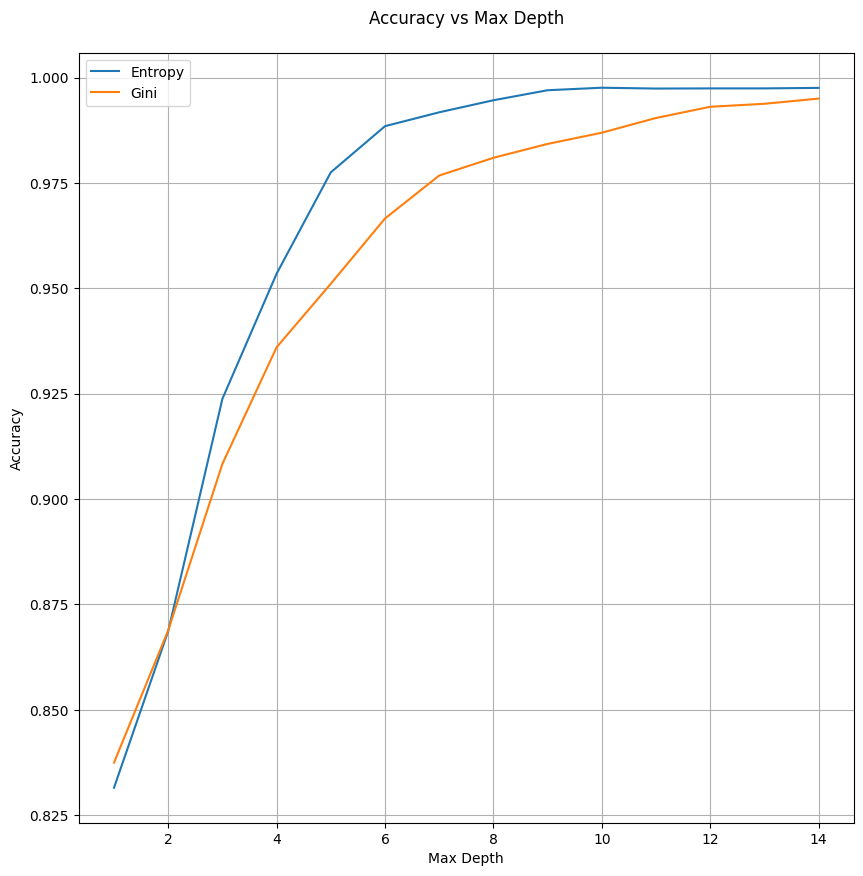

In [56]:
# Plotting graph for Accuracy with different Max_depths

def calculate_accuracy(x_train, y_train, x_test, y_test, criterion, max_depth):
  dt_classifier = DecisionTreeClassifier(criterion=criterion, random_state=42, max_depth=max_depth)
  dt_classifier.fit(x_train, y_train)
  y_pred = dt_classifier.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  return accuracy

max_depths = range(1, 15)
accuracy_entropy = []
accuracy_gini = []

for depth in max_depths:
  accuracy_entropy.append(calculate_accuracy(x_train, y_train, x_test, y_test, 'entropy', depth))
  accuracy_gini.append(calculate_accuracy(x_train, y_train, x_test, y_test, 'gini', depth))

plt.figure(figsize=(10, 10))
plt.plot(max_depths, accuracy_entropy, label='Entropy')
plt.plot(max_depths, accuracy_gini, label='Gini')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth\n')
plt.legend()
plt.grid(True)
plt.show()


In [57]:
#SVM for kernels = ['linear', 'poly', 'rbf', 'sigmoid']

from sklearn.svm import SVC
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
  model_svc = SVC(kernel=kernel)
  model_svc.fit(X_train_scaled, y_train)

  y_train_pred = model_svc.predict(X_train_scaled)
  y_test_pred = model_svc.predict(X_test_scaled)

  train_accuracy = accuracy_score(y_train, y_train_pred)
  test_accuracy = accuracy_score(y_test, y_test_pred)
  print(f"Kernel Type: {kernel}")
  print(f"Training Accuracy: {train_accuracy:.4f}")
  print(f"Testing Accuracy:  {test_accuracy:.4f}")

  print("\nClassification Report (Test Set):\n", classification_report(y_test, y_test_pred))
  print("Confusion Matrix (Test Set):\n", confusion_matrix(y_test, y_test_pred))
  print("\n")

Kernel Type: linear
Training Accuracy: 0.9949
Testing Accuracy:  0.9942

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       201
           1       0.83      0.71      0.77         7
           3       1.00      0.79      0.88        14
           4       1.00      1.00      1.00         2
           5       0.96      0.98      0.97       743
           6       0.67      1.00      0.80         2
           7       0.50      0.33      0.40         3
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00      8238
          10       0.92      0.99      0.95       298
          11       1.00      0.99      1.00     13386
          12       0.00      0.00      0.00         1
          13       1.00      1.00      1.00         1
          14       1.00      0.97      0.99        36
          15       0.98      0.98      0.98       583
          16       1.00    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Kernel Type: poly
Training Accuracy: 0.9974
Testing Accuracy:  0.9964

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       201
           1       1.00      0.71      0.83         7
           2       0.00      0.00      0.00         0
           3       1.00      0.79      0.88        14
           4       1.00      1.00      1.00         2
           5       0.96      1.00      0.98       743
           6       1.00      1.00      1.00         2
           7       0.00      0.00      0.00         3
           8       0.33      1.00      0.50         1
           9       1.00      1.00      1.00      8238
          10       0.96      0.99      0.98       298
          11       1.00      1.00      1.00     13386
          12       0.00      0.00      0.00         1
          13       1.00      1.00      1.00         1
          14       1.00      0.97      0.99        36
          15       1.00      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

Kernel Type: rbf
Training Accuracy: 0.9968
Testing Accuracy:  0.9958

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       201
           1       1.00      0.57      0.73         7
           3       1.00      0.79      0.88        14
           4       1.00      1.00      1.00         2
           5       0.96      0.99      0.97       743
           6       1.00      1.00      1.00         2
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00      8238
          10       0.93      1.00      0.96       298
          11       1.00      1.00      1.00     13386
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       1.00      0.97      0.99        36
          15       1.00      0.99      0.99       583
          16       0.00      0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Kernel Type: sigmoid
Training Accuracy: 0.8712
Testing Accuracy:  0.8692

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.30      0.37      0.33       201
           1       0.00      0.00      0.00         7
           3       0.00      0.00      0.00        14
           4       1.00      0.50      0.67         2
           5       0.62      0.67      0.64       743
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         1
           9       0.98      0.97      0.97      8238
          10       0.20      0.29      0.24       298
          11       0.92      0.93      0.92     13386
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00        36
          15       0.49      0.07      0.12       583
          16       0.00   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Hyperparameter tunning for SVC

from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

svc = SVC()
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_svc = grid_search.best_estimator_
y_pred = best_svc.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the best SVC model: {accuracy:.4f}")

print("\nClassification Report (Test Set):\n", classification_report(y_test, y_pred))
print("Confusion Matrix (Test Set):\n", confusion_matrix(y_test, y_pred))


In [58]:
# Random Forest Model

from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train_scaled, y_train)

y_train_pred = model_rf.predict(X_train_scaled)
y_test_pred = model_rf.predict(X_test_scaled)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy:  {test_accuracy:.4f}")

print("\nClassification Report (Test Set):\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix (Test Set):\n", confusion_matrix(y_test, y_test_pred))

Training Accuracy: 0.9999
Testing Accuracy:  0.9983

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       201
           1       0.83      0.71      0.77         7
           3       1.00      0.79      0.88        14
           4       1.00      1.00      1.00         2
           5       0.99      0.99      0.99       743
           6       1.00      0.50      0.67         2
           7       0.00      0.00      0.00         3
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00      8238
          10       0.96      0.99      0.98       298
          11       1.00      1.00      1.00     13386
          12       0.00      0.00      0.00         1
          13       1.00      1.00      1.00         1
          14       1.00      0.97      0.99        36
          15       1.00      1.00      1.00       583
          16       1.00      0.50      0.67    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **Comparision of Models**

In [63]:
# Comparison between different models for binary class
print("For Binary Class")
data = [
    ["Random Forest", 1.0000,0.9992],
    ["Decision Tree (gini)", 1.0000,0.9983],
    ["Decision Tree (entropy)", 1.0000,0.9987],
    ["KNN", 0.9994,0.9988],
    ["SVC (rbf)", 0.9626, 0.9568],
    ["SVC (poly)",  0.9976,0.9968],
    ["SVC (linear)", 0.9949,0.9942],
    ["Logistic Regression", 0.9751, 0.9742],
    ["SVC (sigmoid)", 0.8591,0.8564]
]

df_new = pd.DataFrame(data, columns=["Model", "Training Accuracy", "Testing Accuracy"])

df_sorted = df_new.sort_values(by="Testing Accuracy", ascending=False).reset_index(drop=True)

print(df_sorted)


For Binary Class
                     Model  Training Accuracy  Testing Accuracy
0            Random Forest             1.0000            0.9992
1                      KNN             0.9994            0.9988
2  Decision Tree (entropy)             1.0000            0.9987
3     Decision Tree (gini)             1.0000            0.9983
4               SVC (poly)             0.9976            0.9968
5             SVC (linear)             0.9769            0.9758
6      Logistic Regression             0.9751            0.9742
7                SVC (rbf)             0.9626            0.9568
8            SVC (sigmoid)             0.8591            0.8564


In [65]:
# Comparison between different models for multi class
print("For Multi Class")
data = [
    ["Random Forest", 0.9999,0.9983],
    ["Decision Tree (gini)", 0.9999,0.9964],
    ["Decision Tree (entropy)",  0.9999,0.9974],
    ["KNN", 0.9987, 0.9978],
    ["SVC (rbf)",0.9968,0.9958],
    ["SVC (poly)",  0.9974,0.9964],
    ["SVC (linear)", 0.9769,0.9758],
    ["Logistic Regression", 0.9895,0.9884],
    ["SVC (sigmoid)",0.8712,0.8692]
]

df_new = pd.DataFrame(data, columns=["Model", "Training Accuracy", "Testing Accuracy"])

df_sorted = df_new.sort_values(by="Testing Accuracy", ascending=False).reset_index(drop=True)

print(df_sorted)


For Multi Class
                     Model  Training Accuracy  Testing Accuracy
0            Random Forest             0.9999            0.9983
1                      KNN             0.9987            0.9978
2  Decision Tree (entropy)             0.9999            0.9974
3     Decision Tree (gini)             0.9999            0.9964
4               SVC (poly)             0.9974            0.9964
5                SVC (rbf)             0.9968            0.9958
6      Logistic Regression             0.9895            0.9884
7             SVC (linear)             0.9769            0.9758
8            SVC (sigmoid)             0.8712            0.8692


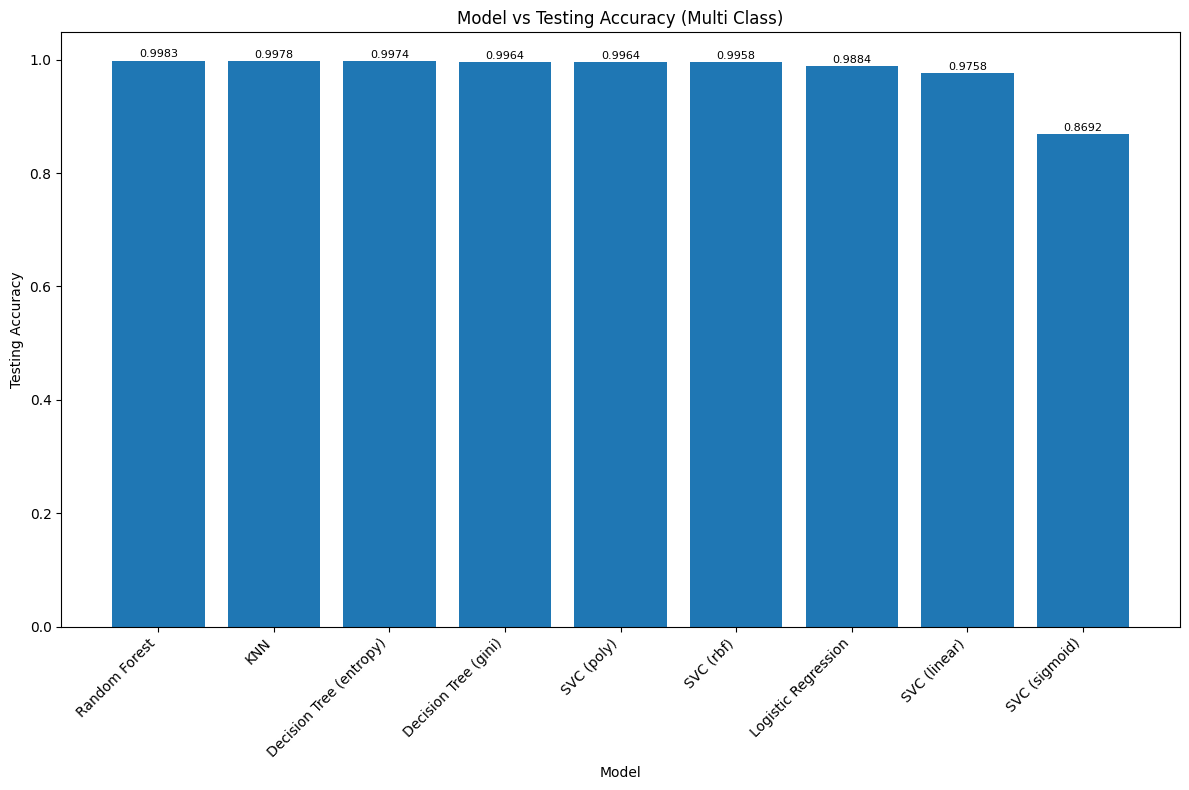

In [1]:
#Multi class
import matplotlib.pyplot as plt
models = [
    "Random Forest", "KNN", "Decision Tree (entropy)", "Decision Tree (gini)",
    "SVC (poly)", "SVC (rbf)", "Logistic Regression", "SVC (linear)", "SVC (sigmoid)"
]
testing_accuracy = [0.9983, 0.9978, 0.9974, 0.9964, 0.9964, 0.9958, 0.9884, 0.9758, 0.8692]
plt.figure(figsize=(12, 8))
bars = plt.bar(models, testing_accuracy)
plt.xlabel("Model")
plt.ylabel("Testing Accuracy")
plt.title("Model vs Testing Accuracy (Multi Class)")
plt.xticks(rotation=45, ha='right')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.002, f'{yval:.4f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


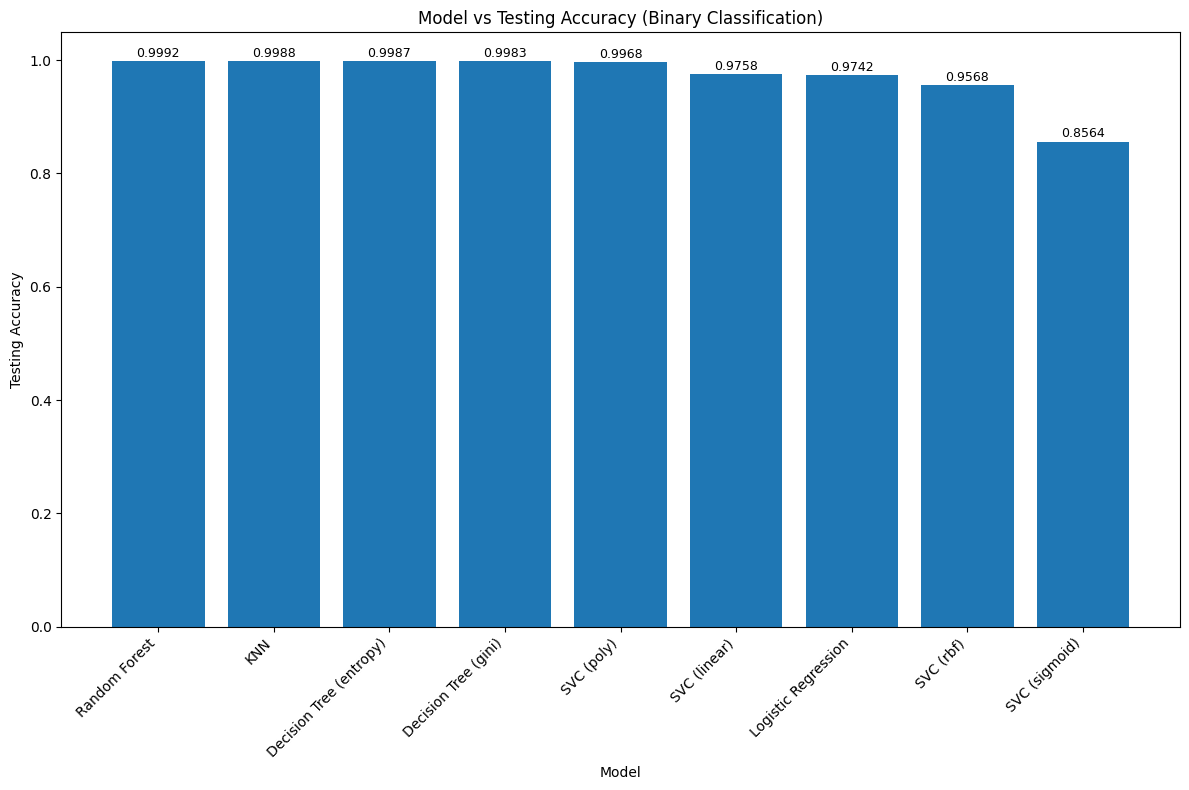

In [2]:
#binary class
import matplotlib.pyplot as plt
models = [
    "Random Forest", "KNN", "Decision Tree (entropy)", "Decision Tree (gini)",
    "SVC (poly)", "SVC (linear)", "Logistic Regression", "SVC (rbf)", "SVC (sigmoid)"
]
testing_accuracy = [0.9992, 0.9988, 0.9987, 0.9983, 0.9968, 0.9758, 0.9742, 0.9568, 0.8564]

# Plotting the bar graph
plt.figure(figsize=(12, 8))
bars = plt.bar(models, testing_accuracy)
plt.xlabel("Model")
plt.ylabel("Testing Accuracy")
plt.title("Model vs Testing Accuracy (Binary Classification)")
plt.xticks(rotation=45, ha='right')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.002, f'{yval:.4f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()
